# Local Linear Embeddings (LLEs)
Darius Muntean and Brett Storoe


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
red_wine_data = pd.read_csv("winequality-red.csv", delimiter = ";")
white_wine_data = pd.read_csv("winequality-white.csv", delimiter = ";")

white_wine_data = white_wine_data.sample(n=len(red_wine_data), random_state=42).reset_index(drop=True)

In [3]:
red_wine_data.size

19188

In [4]:
red_wine_data["WineType"] = 0
white_wine_data["WineType"] = 1
wine_data = pd.concat([red_wine_data, white_wine_data])
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.7,0.34,0.31,16.4,0.051,20.0,146.0,0.99834,3.06,0.54,9.1,5,1
1595,9.3,0.31,0.49,1.3,0.042,34.0,147.0,0.99480,3.11,0.46,9.8,5,1
1596,6.4,0.17,0.27,6.7,0.036,88.0,223.0,0.99480,3.28,0.35,10.2,6,1
1597,7.5,0.29,0.36,15.7,0.050,29.0,124.0,0.99680,3.06,0.54,10.4,5,1


In [46]:
from sklearn.preprocessing import StandardScaler

wine_features = wine_data.drop(columns=["WineType"])

scaler = StandardScaler()
wine_features_normalized = scaler.fit_transform(wine_features)

embedding = LocallyLinearEmbedding(n_components=0, n_neighbors=5)
wine_data_transformed = embedding.fit_transform(wine_features_normalized)

InvalidParameterError: The 'n_components' parameter of LocallyLinearEmbedding must be an int in the range [1, inf). Got 0 instead.

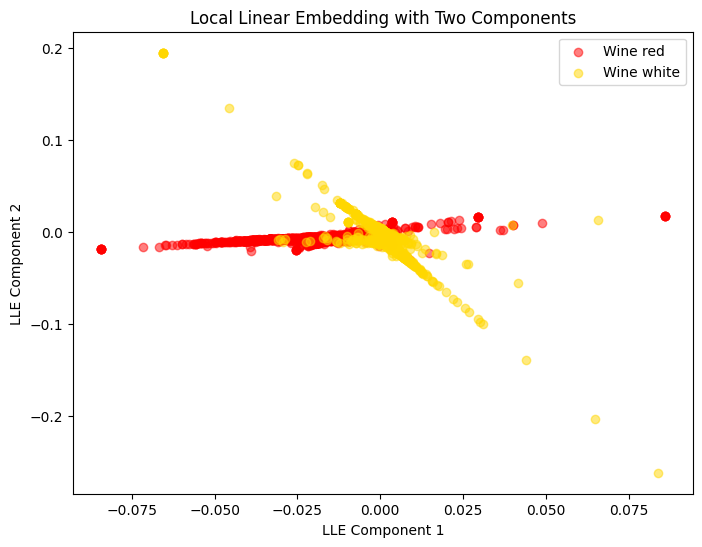

In [47]:
import matplotlib.pyplot as plt

# Boolean masks
reds = wine_data["WineType"] == 0
whites = wine_data["WineType"] == 1

plt.figure(figsize=(8, 6))

# Red wine
plt.scatter(
    wine_data_transformed[reds, 0],
    wine_data_transformed[reds, 1],
    color="red",
    alpha=0.5,
    label="Wine red",
)

# White wine
plt.scatter(
    wine_data_transformed[whites, 0],
    wine_data_transformed[whites, 1],
    color="gold",
    alpha=0.5,
    label="Wine white",
)

plt.xlabel("LLE Component 1")
plt.ylabel("LLE Component 2")
plt.title("Local Linear Embedding with Two Components")
plt.legend()
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine_features_normalized, 
    wine_data["WineType"], 
    test_size=0.2, 
    random_state=42, 
    stratify=wine_data["WineType"]
)

embedding_split = LocallyLinearEmbedding(n_components=2, n_neighbors=100)
X_train_lle = embedding_split.fit_transform(X_train)
X_test_lle = embedding_split.transform(X_test)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lle, y_train)

y_pred = knn.predict(X_test_lle)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on test set: 0.9484375

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       320
           1       0.94      0.96      0.95       320

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640

Confusion Matrix:
 [[300  20]
 [ 13 307]]
